# HubMap- Hacking the Kidney
#### Goal - Mapping the human body at function tissue unit level - detect glomeruli FTUs in kidney

#### Implementation of Kaggle Notebook - Innovation Prize Winner - Deep Flash2 

#### Create segmentations masks from RLE and probability density function (PDF) for efficient sampling from mask and anatmical structure

Link - https://www.kaggle.com/matjes/hubmap-efficient-sampling-ii-deepflash2#HuBMAP-masks-and-probability-density-function


**Inputs**
- RLE glumeroli segmentations ([challenge dataset](https://www.kaggle.com/c/hubmap-kidney-segmentation/data))
- Anatomical region masks ([.zarr converted](https://www.kaggle.com/matjes/hubmap-anatomy-zarr))
    - Values: 0=other, 1=cortex, 2=medulla
    

**Settings**

The name of the notbook contains the parameters of the probability density function. 
Glumeroli pixels are fixed with a sampling weight of 1. Then, for instance, *pdf_0.5_0.25_0.01* means:

- Sampling weight for cortex regions (`cortex_value`): 0.5 
- Sampling weight for medulla regions (`medulla_value`): 0.25
- Sampling weight for other regions (`fbr`, foreground-background-ratio): 0.01       

###### Step 1 - Install useful libraries

In [8]:
# Install zarr and load packages
# !pip install -qq zarr
import cv2, zarr, gc
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from pathlib import Path
gc.enable()

In [9]:
# from https://www.kaggle.com/paulorzp/rle-functions-run-lenght-encode-decode
def rle2mask(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [
        np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])
    ]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo : hi] = 1
    return img.reshape(shape).T

##### Step 2 - Set paths and configuration

In [12]:
path = Path(r'C:\Users\soodn\Downloads\Naveksha\Kaggle HuBMAP\Data\hubmap-kidney-segmentation-data')
df_train = pd.read_csv(path/"train.csv", index_col = 'id')
df_info = pd.read_csv(path/"HuBMAP-20-dataset_information.csv")
grp_pdf = zarr.open_group('images_scale2/')

class CONFIG:
    scale = 2        # Downscale final mask by factor 2
    cdf_size = 512   # Downscale CDF for memory efficient loading during training
    bg_p = 0.1       # Background Probability
    cortex_p = 0.7   # Cortex Probability
    medulla_p = 0.2  # Medulla Probability
    
cfg = CONFIG()

# Output
root = zarr.group(f'masks_scale{cfg.scale}')
# Saving cdf in 'pdfs' due to naming conventions for sampling during training in deepflash2
g_msk, g_pdf, g_cdf = root.create_groups('labels', 'pdfs', 'cdfs', overwrite=True)

###### Step 3 - Repeat for all images

2f6ecfcdf with shape (31278, 25794)
Scaling to (12897, 15639)
Getting glomeruli stats
Found 161 glomeruli


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


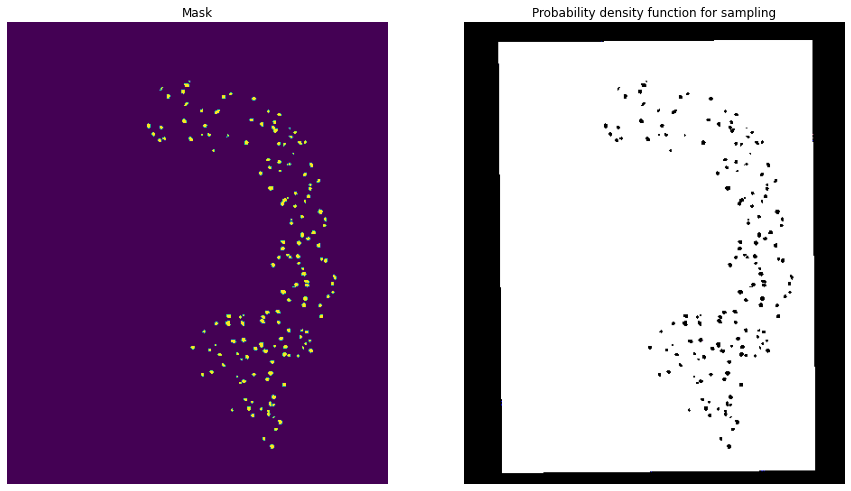

8242609fa with shape (31299, 44066)
Scaling to (22033, 15649)
Getting glomeruli stats
Found 586 glomeruli


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


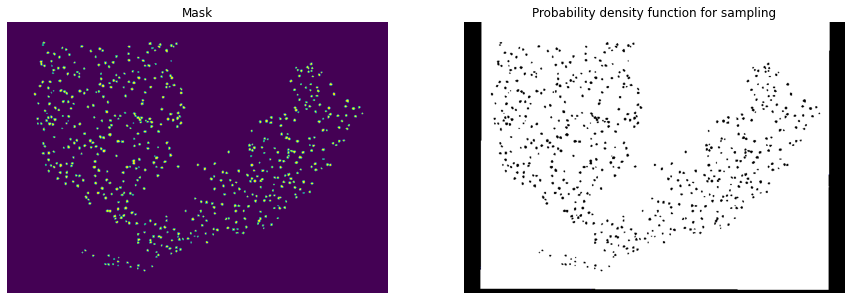

aaa6a05cc with shape (18484, 13013)
Scaling to (6506, 9242)
Getting glomeruli stats
Found 100 glomeruli


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


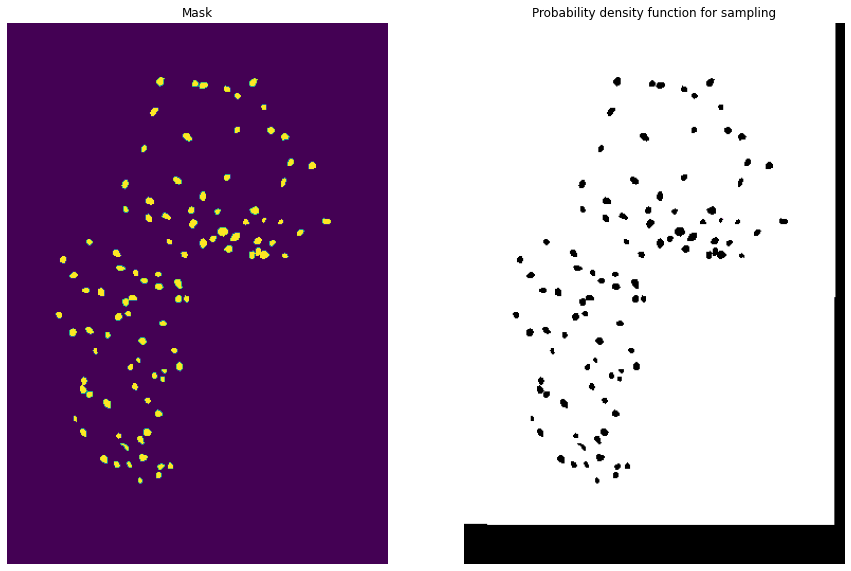

cb2d976f4 with shape (34940, 49548)
Scaling to (24774, 17470)
Getting glomeruli stats
Found 320 glomeruli


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


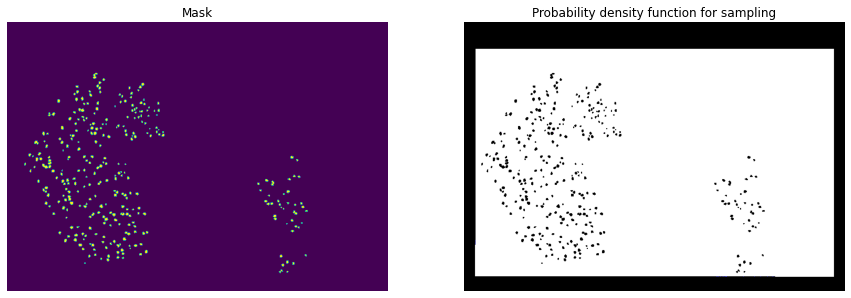

b9a3865fc with shape (31295, 40429)
Scaling to (20214, 15647)
Getting glomeruli stats
Found 466 glomeruli


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


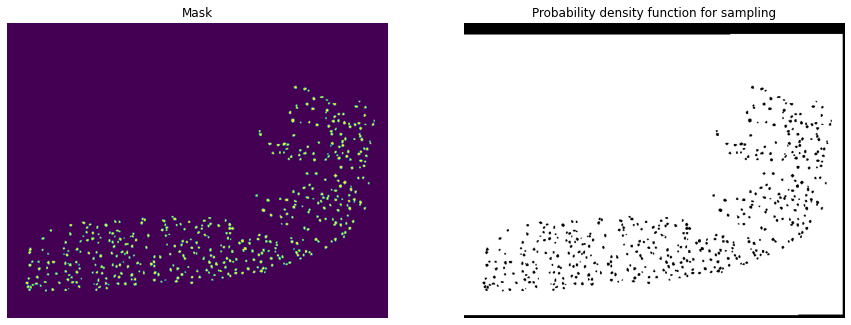

b2dc8411c with shape (14844, 31262)
Scaling to (15631, 7422)
Getting glomeruli stats
Found 136 glomeruli


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


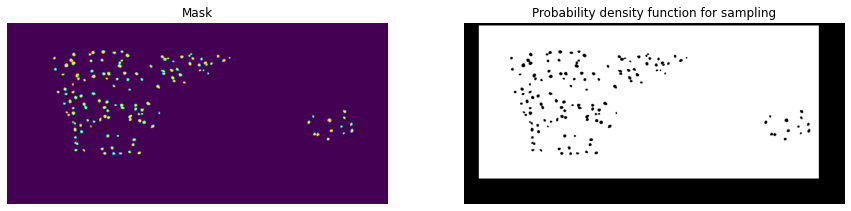

0486052bb with shape (25784, 34937)
Scaling to (17468, 12892)
Getting glomeruli stats
Found 131 glomeruli


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


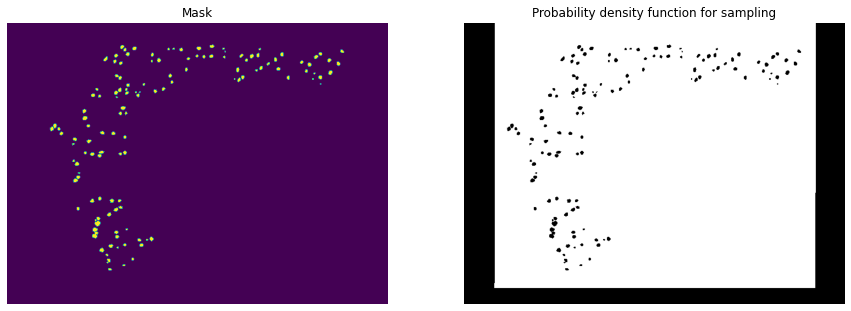

e79de561c with shape (16180, 27020)
Scaling to (13510, 8090)
Getting glomeruli stats
Found 180 glomeruli


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


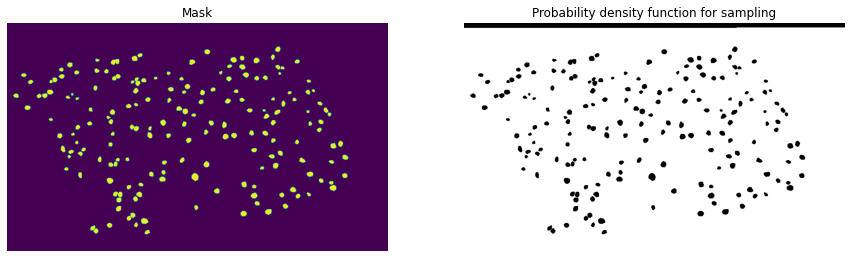

095bf7a1f with shape (38160, 39000)
Scaling to (19500, 19080)
Getting glomeruli stats
Found 347 glomeruli


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


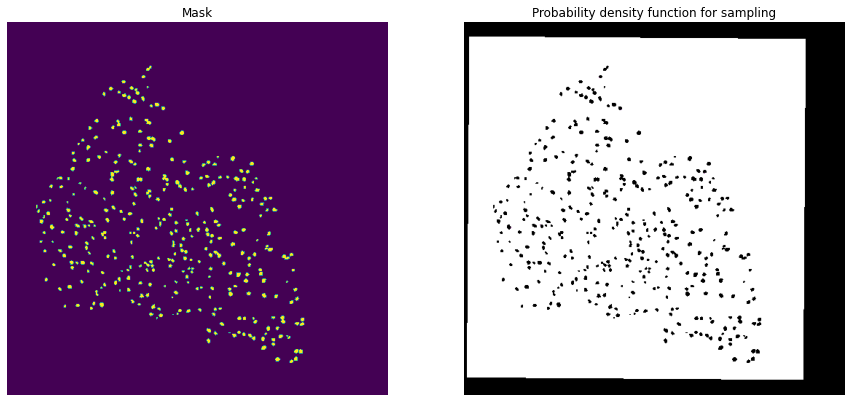

54f2eec69 with shape (30440, 22240)
Scaling to (11120, 15220)
Getting glomeruli stats
Found 140 glomeruli


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


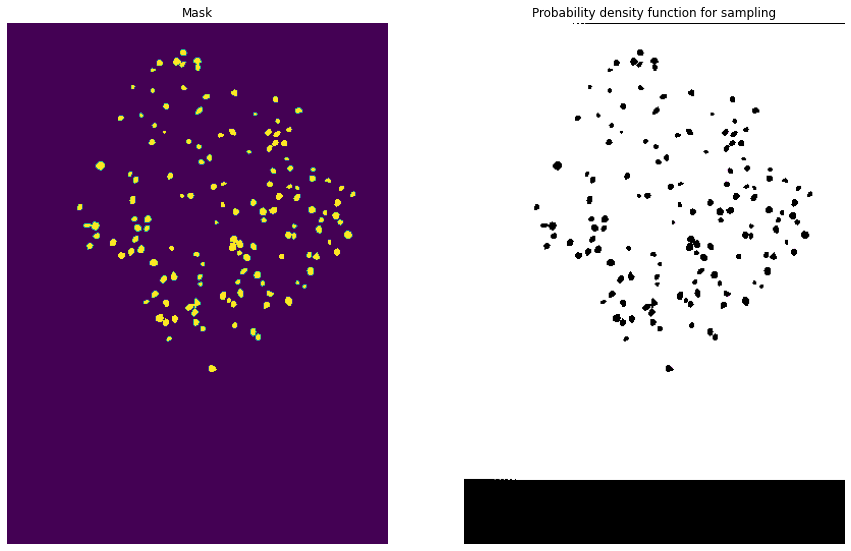

4ef6695ce with shape (39960, 50680)
Scaling to (25340, 19980)
Getting glomeruli stats
Found 439 glomeruli


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


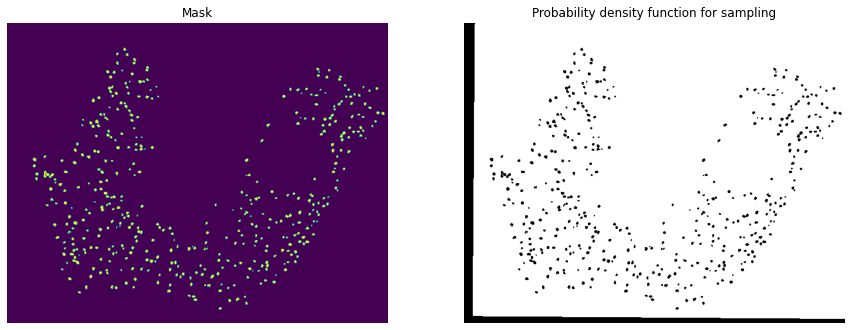

26dc41664 with shape (38160, 42360)
Scaling to (21180, 19080)
Getting glomeruli stats
Found 244 glomeruli


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


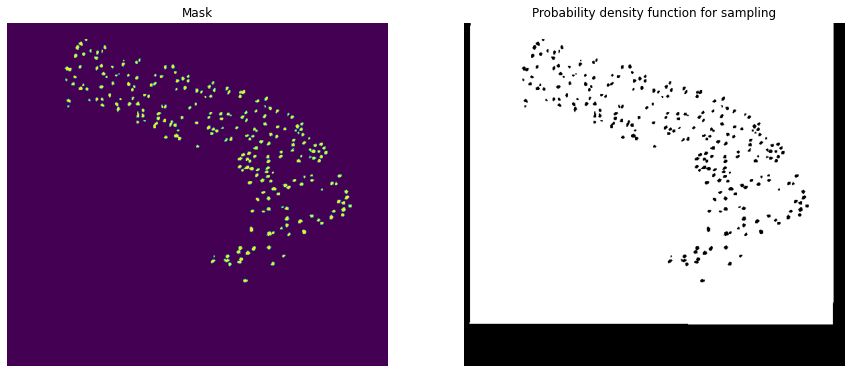

c68fe75ea with shape (26840, 49780)
Scaling to (24890, 13420)
Getting glomeruli stats
Found 118 glomeruli


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


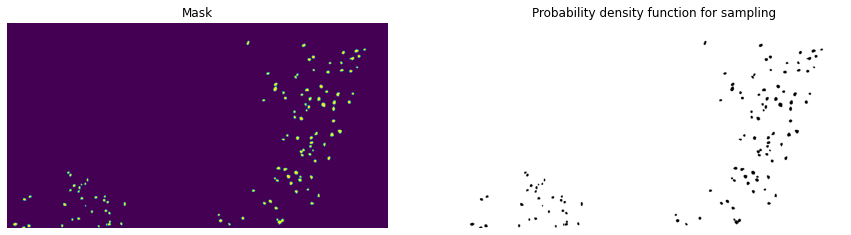

afa5e8098 with shape (36800, 43780)
Scaling to (21890, 18400)
Getting glomeruli stats
Found 234 glomeruli


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


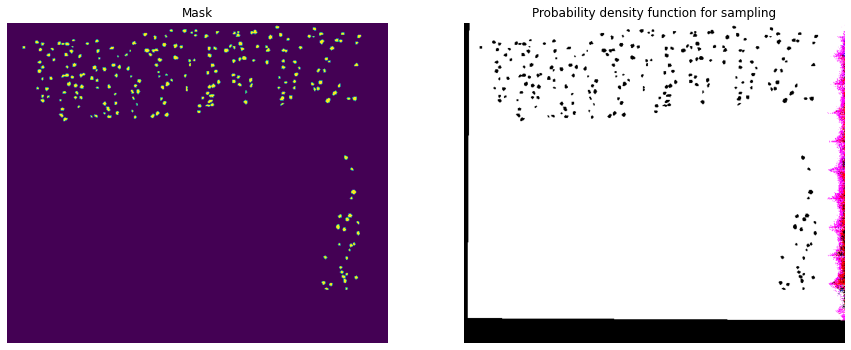

1e2425f28 with shape (26780, 32220)
Scaling to (16110, 13390)
Getting glomeruli stats
Found 179 glomeruli


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


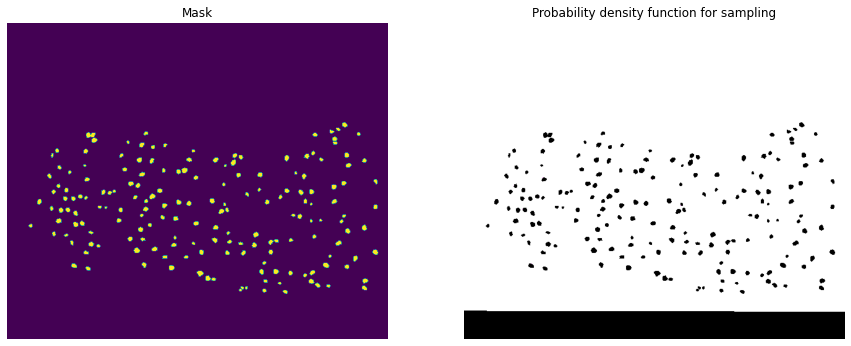

cy            cx   left    top  width  height  \
idx       index                                                            
2f6ecfcdf 0       6185.563702   2002.304985   6149   1970     66      62   
          1       6083.822111   2132.082248   5994   2064    182     136   
          2       5226.641731   2261.644542   5180   2194     97     136   
          3       5958.549694   2350.953992   5886   2275    144     156   
          4       7570.620290   2431.347669   7503   2378    128      97   
...                       ...           ...    ...    ...    ...     ...   
1e2425f28 173     9951.864195  11223.956479   9875  11144    152     147   
          174    10120.264892  11224.335254  10057  11156    124     133   
          175    10880.806311  11337.982930  10787  11258    187     164   
          176     9868.803057  11322.052234   9807  11267    123     114   
          177    11773.816389  11394.827952  11672  11310    203     171   

                  area  
idx       index         
2f6ecfcdf 0       3069  
          1      19113  
          2       8181  
          3      17497  
          4       9394  
...                ...  
1e2425f28 173    13350  
          174    12322  
          175    21266  
          176    10338  
          177    23784  

[3766 rows x 7 columns]

In [13]:
df_list = []
for idx, row in df_train.iterrows():
    
    # Get image info
    img_info = df_info[df_info.image_file==f'{idx}.tiff']
    shape = (img_info.height_pixels.values[0], img_info.width_pixels.values[0])
    print(idx, 'with shape', shape)
    
    msk = rle2mask(row.encoding, (shape[1], shape[0])).astype('uint8')
    
    # Plot
    fig, ax = plt.subplots(ncols=2, figsize=(15,15))
    resize_w = int((msk.shape[1]/msk.shape[0])*cfg.cdf_size)
    ax[0].imshow(cv2.resize(msk, dsize=(resize_w, cfg.cdf_size)))
    ax[0].set_title('Mask')
    ax[0].set_axis_off()
    
    pdf = grp_pdf[idx][:]
    
    if cfg.scale!=1:
        new_size = (msk.shape[1] // cfg.scale, msk.shape[0] // cfg.scale)
        print('Scaling to', new_size)
        msk = cv2.resize(msk, new_size)
        pdf = cv2.resize(pdf, new_size)
        
    pdf = pdf.astype('float32')          
    pdf[pdf==0] = cfg.bg_p/np.sum(pdf==0)
    pdf[msk>0] = 0
    pdf[pdf==1] = cfg.cortex_p/np.sum(pdf==1)
    pdf[pdf==2] = cfg.medulla_p/np.sum(pdf==2)    
      
    print('Getting glomeruli stats')
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(msk, connectivity=4)
    print(f'Found {nb_components} glomeruli')
    df_centroids = pd.DataFrame(centroids[1:], columns=['cy', 'cx'])
    df_centroids = df_centroids.join(pd.DataFrame(stats[1:], columns=['left', 'top', 'width', 'height', 'area']))
    df_centroids['idx'] = idx 
    df_centroids.reset_index(inplace=True)
    df_centroids.set_index(['idx', 'index'], inplace=True)
    df_list.append(df_centroids)
    
    # Saving 
    g_msk[idx] = msk
    g_pdf[idx] = pdf
    
    # Saving cdf
    pdf = cv2.resize(pdf, dsize=(resize_w, cfg.cdf_size))      
    g_cdf[idx] = np.cumsum(pdf/np.sum(pdf)) 
            
    ax[1].imshow(pdf)
    ax[1].set_title('Probability density function for sampling')
    ax[1].set_axis_off() 
    plt.show()


df_stats = pd.concat(df_list)
df_stats.to_csv(f'masks_scale{cfg.scale}/roi_stats.csv')
df_stats